In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

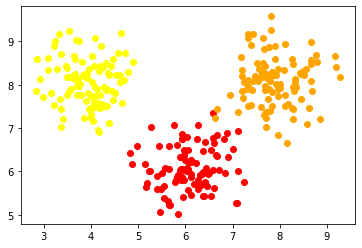

In [5]:
n=100
std=0.5
bananas_width= np.random.normal(4,std,n)
bananas_length=np.random.normal(8,std,n)

apple_width=np.random.normal(6,std,n)
apple_length=np.random.normal(6,std,n)

orange_width=np.random.normal(8,std,n)
orange_length=np.random.normal(8,std,n)

width=np.concatenate((bananas_width,apple_width,orange_width))
length=np.concatenate((bananas_length,apple_length,orange_length))

X=np.array([width,length]).T

bananas_label=np.zeros(n,dtype='int')
apple_label=np.ones(n,dtype='int')
orange_label=np.ones(n,dtype='int')+1

Y=np.concatenate((bananas_label,apple_label,orange_label))

plt.scatter(X[:n,0],X[:n,1],c='yellow')
plt.scatter(X[n:2*n,0],X[n:2*n,1],c='red')
plt.scatter(X[2*n:,0],X[2*n:,1],c='orange')

# KNN

In [14]:
class KNearestNeighbors:
    def __init__(self,k):
        self.k=k
    #train
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
        self.number_class=len(np.unique(y_train))
    def nearneighbors(self,x_test):
        distance=np.sqrt(np.sum((x_test-self.x_train)**2,axis=1))
        near_neighbors=np.argsort(distance)[:self.k]
        return near_neighbors
    
    #test
    def predict(self,x_test):
        near_neighbors=self.nearneighbors(x_test)
        y=np.argmax(np.bincount(self.y_train[near_neighbors]))
        return y
    
#     def evaluate(self,x_test,y_test):
#         self.x_test=x_test
#         self.y_test=y_test
        
            
    

In [15]:
knn = KNearestNeighbors(k=5)
knn.fit(X,Y)

In [8]:
fruit_new = np.array([4.7,6.8])
y_pred = knn.predict(fruit_new)
print(y_pred)

0


In [9]:
fruit = {0:'موز', 
        1:"سیب"}
print(fruit[y_pred])

موز


In [16]:
fruit_new = np.array([8,7])
y_pred = knn.predict(fruit_new)
print(y_pred)
fruit = {0:'موز', 
        1:"سیب",
        2:'پرتقال'}
print(fruit[y_pred])

ValueError: operands could not be broadcast together with shapes (2,2) (300,2) 

In [17]:
f=np.random.randint(100)
banana_test = 

56
